# Project 3.02 - Data Wrangling and NLP Parsing

## Table of Contents

- [Functions](#Functions)

- [Imports](#Imports)

- [Data Cleaning](#Data-Cleaning)
- [Tokenize Lemmitize and Stemming](#Tokenize_Lemmitize_and_Stemming)

- [Basic Distribution Checks and Export](#Basic-Distribution-Checks)

- [Prepare and Export](#Prepare-and-Export)


## Functions 

In [566]:
#Create Subplot of histogram
'''This function creates a word_length and count subplot 
that we will use for the two datasets we are comparing.

Framework first developed by Eric Bayless in a September 2020 GA course.
'''

def hist_subplot(dframe1, dframe2, x1_label, x2_label, y1_label, suptitle, sub1, sub2, fname):
    #Create figure and axis objects; 2 by 2 subplot
    fig, ax = plt.subplots(2,2, figsize=(16,10))

    # Do hisplot; ax is grid or matrix area, so 0,0 is top left corner
    sns.histplot(dframe1['length'], ax=ax[0,0], bins = 30)
    sns.histplot(dframe2['length'], ax=ax[0,1], bins = 30)
    sns.histplot(dframe1['word_count'], ax=ax[1,0], bins = 30)
    sns.histplot(dframe2['word_count'], ax=ax[1,1], bins = 30)

    # do formatting and make consistent axis ranges
    ax[0,0].set(xlabel=x1_label, ylabel=y1_label, ylim=[0,1750], title= (x1_label + " of " + sub1))
    ax[0,1].set(xlabel=x1_label, ylabel=y1_label, ylim=[0,1750], title=(x1_label + " of " + sub2))
    ax[1,0].set(xlabel=x2_label,ylabel=y1_label, xlim=[0,60], ylim=[0,1750], title= (x2_label + " of " + sub1))
    ax[1,1].set(xlabel=x2_label, ylabel=y1_label, xlim=[0,60], ylim=[0,1750], title= (x2_label + " of " + sub2))

    fig.suptitle(suptitle, fontsize=20)

    results_path = 'Images/'+fname+ '.png'
    plt.savefig(results_path);


In [567]:
def hist(dframe, bins, Xlabel, Ylabel, title, fname):
    '''This function creates a presentation ready histogram'''
    plt.figure(figsize=(8,8))
    plt.hist(dframe, bins = bins);     
    plt.xlabel(Xlabel, fontsize=16)
    plt.ylabel(Ylabel, fontsize=16)
    plt.title(title, fontsize =25)
    
    results_path = 'Images/'+fname+ '.png'
    plt.savefig(results_path);
         
#hist(df1['length'], 30, 'test', 'test', 'test', 'test')       

In [568]:

def data_transform(dframe):
    '''This function transforms the bulk of our data to be production ready, 
    with the exception of the NPL transformations we will do later'''
    #DropNA rows
    print('Null rows are:')
    print(dframe.isna().sum())
    dframe.dropna(inplace=True)
    print('NAN rows dropped')
    
    #Drop rows that are only videos
    print(f" Is_video sum is {dframe['is_video'].sum()}")
    dframe.drop(columns = 'is_video', inplace=True)
    print("Is_video posts dropped from columns")
    
    #Apply length and word_count columns from text
    dframe['length'] = dframe['title'].apply(len)
    dframe['word_count'] = dframe['title'].apply(lambda x: len(x.split()))
    return "Data transformed"



In [569]:
def tokenize(data, col):
    '''This nlp function removes any whitespace and leaves only the alphabet'''
    
    token = RegexpTokenizer(r"[\w/\']+")
    data['tokenized_words'] = data[col].apply(lambda x: token.tokenize(x.lower()))
    

    
    return 'tokenized words generated...'

In [570]:
def lemmatize(data, column):
    '''This nlp function groups together the 
    inflected forms of a word so they can be analysed as a single item, 
    identified by the word's lemma, or dictionary form.This looks at the context of the word being used'''
    
    #create list and instantiate lemmatizer
    list_ = []
    lemmatizer = WLem()
    
    
    #loop through rows and stem, adding new column
    for row in data[column]:
        lem_row = [lemmatizer.lemmatize(string) for string in row]
        list_.append(lem_row)
           
    data['lemmatized_tokenized_words'] = list_
   
    return 'lemmatized words generated...'

In [571]:
def stemmatize(data, column):
    '''This nlp function chops of the end of a word to get it to it's stem, or base. 
    An alternative to lemmatizing that is less tied to the context of its use.'''
    
    #create list and instantiate stemmer
    list_ = []
    P_Stem = PorterStemmer()
    
    #loop through rows and stem, adding new column
    for row in data[column]:
        stemmed= [P_Stem.stem(string) for string in row]
        list_.append(stemmed)
    data["stemmatized_tokenized_words"]= list_               
    
    return 'stems generated...'

## Imports

In [572]:
#Import NLP packages
import nltk
from nltk.stem import WordNetLemmatizer as WLem
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

#Import Cleaning and Viz packages
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
%matplotlib inline

## Data Cleaning

In [573]:
#Read_CSV
df_fin = pd.read_csv('Data/finance.csv')
df_econ = pd.read_csv('Data/economics.csv')
df_fin.tail()

/Users/nathanmckinney/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (8,19,75,76,77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/nathanmckinney/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3,5,8,19,27,28,30,31,81,82) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,author_flair_background_color,author_flair_text_color,crosspost_parent,crosspost_parent_list,is_gallery,author_flair_template_id,author_cakeday,gallery_data,media_metadata,distinguished
10022,[],False,kmuinnovation,NaN,[],NaN,text,t2_42xdt,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10023,[],False,kmuinnovation,NaN,[],NaN,text,t2_42xdt,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10024,[],False,tacunningham00,NaN,[],NaN,text,t2_3zodhf9b,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10025,[],False,Rdock87,NaN,[],NaN,text,t2_17tnl0if,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10026,[],False,financealtechnical,NaN,[],NaN,text,t2_5j4cfdoq,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [574]:
#Show columns we can select
df_fin.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_created_from_ads_ui', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_richtext', 'link_flair_text_color', 'link_flair_type',
       'locked', 'media_only', 'no_follow', 'num_comments', 'num_crossposts',
       'over_18', 'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'removed_by_category', 'retrieved_on', 'score', 'selftext',
       'send_replies', 'spoiler', 'stickied', 'subreddit', 'subreddit_id',
       'subreddit_subscribers', 'subreddit_type', 'thumbnail', 'tit

In [575]:
#Select our dataframe rows
df_fin = df_fin[['author', 'created_utc','id', 'title', 'score', 'is_video', 'num_comments', 'subreddit']]
df_econ = df_econ[['author', 'created_utc','id', 'title', 'score', 'is_video', 'num_comments', 'subreddit']]


#### We selected the above columns primarily because of their layer of detail or relevance to our analysis, with the exception of is_video, which we will use to drop non-text posts.

In [576]:
#Add title case to subreddit name for plot
df_fin['subreddit'] = df_fin.subreddit.str.capitalize()
df_econ['subreddit'] = df_econ.subreddit.str.capitalize()

In [577]:

#check UTC time to see earliest date of posts
epoch_time = df_fin['created_utc'].min()
print(datetime.datetime.fromtimestamp(epoch_time))


2020-07-31 18:05:39


In [578]:
#check UTC time to see earliest date of posts

epoch_time = df_econ['created_utc'].min()
print(datetime.datetime.fromtimestamp(epoch_time))



2020-12-02 13:17:45


#### Our data, which is the same shape, spans two different ranges in terms of time.

In [579]:
#check duplicates
df_fin['created_utc'].min()

print(df_fin.duplicated().sum())
duplicate = df_fin[df_fin.duplicated()]
duplicate.head(2)

26


,author,created_utc,id,title,score,is_video,num_comments,subreddit
27,Sufficient_Aide_9696,1631299360,plr00k,Former Assistant Secretary of Homeland Securit...,1,False,0,Finance
28,[deleted],1631298305,plqo10,"Mastercard makes a big bet on crypto, buying b...",1,False,0,Finance


#### Below we begin several layers of cleaning, dropping duplicates, null values, and video posts

In [580]:
#Drop duplicates
df_fin.drop_duplicates(inplace=True)
df_econ.drop_duplicates(inplace=True)

In [581]:
#Transform data using function
data_transform(df_fin)

Null rows are:
author          0
created_utc     0
id              0
title           1
score           0
is_video        0
num_comments    0
subreddit       0
dtype: int64
NAN rows dropped
 Is_video sum is 49
Is_video posts dropped from columns


'Data transformed'

In [582]:
#Transform data using function
data_transform(df_econ)

Null rows are:
author          0
created_utc     0
id              0
title           0
score           0
is_video        0
num_comments    0
subreddit       0
dtype: int64
NAN rows dropped
 Is_video sum is 71
Is_video posts dropped from columns


'Data transformed'

## Tokenize_Lemmitize_and_Stemming

#### Below, we apply different text transformations to our text data to remove whitespace, punctuation, and other linguistic operations (detailed in function)


In [583]:
#Tokenize data
tokenize(df_fin, 'title')
tokenize(df_econ, 'title')


'tokenized words generated...'

In [584]:
#Lemmatize
lemmatize(df_econ, 'tokenized_words')
lemmatize(df_fin, 'tokenized_words')


'lemmatized words generated...'

In [585]:
#Stemmatize text data
stemmatize(df_econ, 'tokenized_words')
stemmatize(df_fin, 'tokenized_words')


'stems generated...'

In [586]:
df_fin.head(2)

,author,created_utc,id,title,score,num_comments,subreddit,length,word_count,tokenized_words,lemmatized_tokenized_words,stemmatized_tokenized_words
0,kmuinnovation,1631255155,plfj7f,Schweizer Kredit Rangliste des Monats Septembe...,1,0,Finance,52,7,"[schweizer, kredit, rangliste, des, monats, se...","[schweizer, kredit, rangliste, de, monats, sep...","[schweizer, kredit, ranglist, de, monat, septe..."
1,sillychillly,1631255546,plfm8v,Mastercard acquires CipherTrace to enhance cry...,1,0,Finance,62,7,"[mastercard, acquires, ciphertrace, to, enhanc...","[mastercard, acquires, ciphertrace, to, enhanc...","[mastercard, acquir, ciphertrac, to, enhanc, c..."


## Basic Distribution Checks

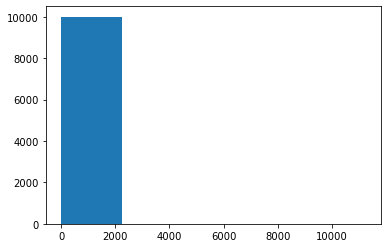

In [589]:
#Show the range of our upvote scores
plt.hist(df_fin['score'], bins=5);


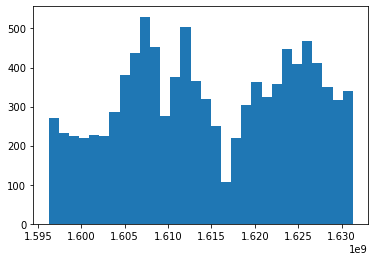

In [554]:
#Show hist of utc
plt.hist(df_fin['created_utc'], bins=30);

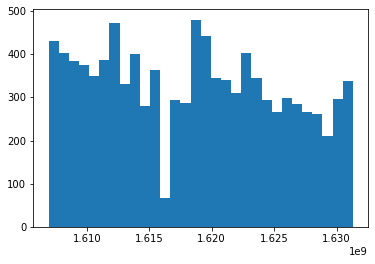

In [555]:
plt.hist(df_econ['created_utc'], bins=30);

#### There is a gap within postings at around the same time in both datasets, but the reason is yet to be determined. This won't matter in the context of our analysis

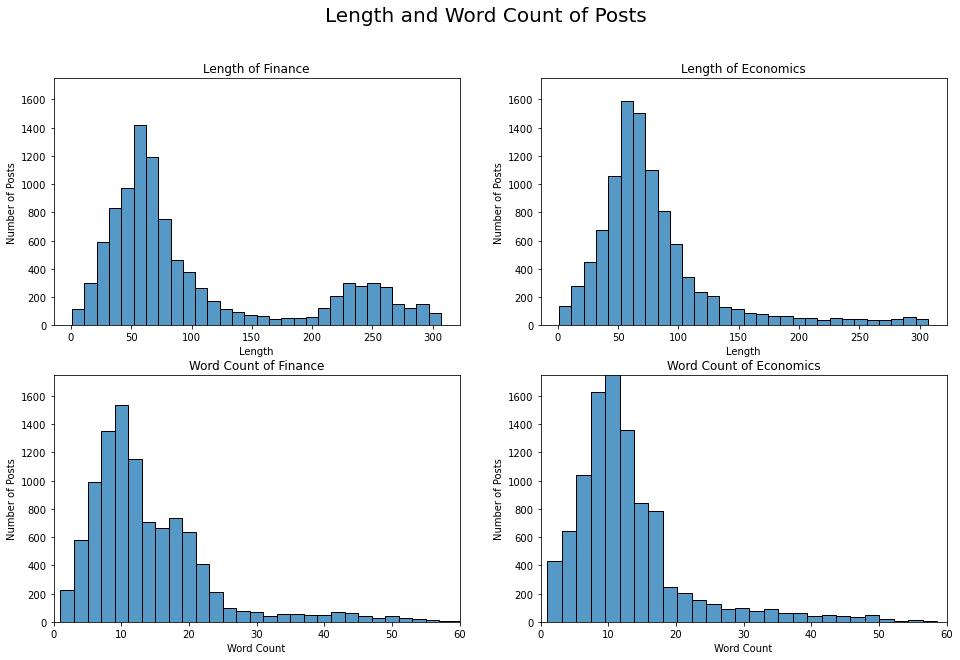

In [556]:
#Hist(df1, df2, xlabel1, xlabel2, SupTitle, Subreddit1, Subreddit2, Filename for saved image) Bins = 30
hist_subplot(df_fin, df_econ, 'Length', 'Word Count', 'Number of Posts', 'Length and Word Count of Posts', 'Finance', 'Economics', 'Sub_Hist')

#### The Length and Word Count of our databases show a similar distribution (skewed, long-tail), with the exception of Finance, which has some degree of bi-modality, likely due to the use of larger words related to finance terminology. It's possible a np.log can be used to improve distribution.

## Prepare and Export

In [557]:
#Rename columns to be human readable
df_fin.rename(columns = {'created_utc':'date created (epoch time)', 'id': 'post_id', 'title':'body',
                              'score':'upvote score', 'num_comments': 'number of comments'}, inplace = True)
df_econ.rename(columns = {'created_utc':'date created (epoch time)', 'id': 'post_id', 'title':'body',
                              'score':'upvote score', 'num_comments': 'number of comments'}, inplace = True)


In [558]:
#Export cleaned CSV's
df_fin.to_csv('./Data/fin_cleaned.csv', index = False)
df_econ.to_csv('./Data/econ_cleaned.csv', index = False)

In [559]:
# Combine dataframes for analysis
mixed_dframe = pd.concat([df_fin, df_econ])

mixed_dframe.to_csv('./Data/Reddit_Posts.csv', index = False)